In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("FLETES LARRAZ 2024.xlsx", sheet_name="ENERO 2025")

In [3]:
#DATA CLEANING 

## Limpieza de filas y columnas
df.drop(0,inplace=True)
df.drop(1,inplace=True)
df.drop(3,inplace=True)
df.drop(4,inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(columns="Unnamed: 11",inplace=True)
df.drop(columns="Unnamed: 12",inplace=True)
df.drop(columns="Unnamed: 13",inplace=True)
df.drop(columns="Unnamed: 15",inplace=True)
df.drop(columns="Unnamed: 16",inplace=True)
df = df.drop(df.columns[-2:], axis=1)

#La primera fila se convierte en los titulos
df= df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)

#Borras los datos que el precio del flete es 0
df = df[df["PRECIO-FLETE"]!=0]


In [4]:
df["nro_camion"]=df["FECHA"].notna().cumsum()
columnas_nuevo_orden = ['nro_camion', 'FECHA', 'PLANILLA', 'CAMIÓN', 'CLIENTE', 'BULTOS', 'LOCALIDAD', 'EXPRESO ', 'REMITOS', 'PRECIO-FLETE', 'PRECIO-OTROS', 'VALOR DECLARADO']
df = df[columnas_nuevo_orden]

In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(columns="index",inplace=True)

In [7]:
df_viajes = df[df["LOCALIDAD"]!="Rosario"].groupby("nro_camion").size().to_frame("Cantidad_de_Destinos")
df_viajes.drop(22,inplace=True)

In [8]:
localidades_camiones = df[df["FECHA"].notna()]["LOCALIDAD"].to_frame()
localidades_camiones.reset_index(inplace=True)
localidades_camiones.drop(columns="index",inplace=True)
localidades_camiones.index +=1

In [9]:
df_viajes["LOCALIDAD"] = localidades_camiones["LOCALIDAD"]

In [15]:
df_viajes["PROVEEDOR_A"]=np.nan
df_viajes["PROVEEDOR_B"]=np.nan
df_viajes["Opcion_Conveniente"] = np.nan

In [16]:
df_viajes.loc[df_viajes["LOCALIDAD"] == "CABA", "PROVEEDOR_A"] = 186600 + 55500 * (df_viajes["Cantidad_de_Destinos"] - 1)
df_viajes.loc[df_viajes["LOCALIDAD"].isin(["Buenos Aires", "Ciudadela", "Lomas del Mirador", "Moron", "Avellaneda"]), "PROVEEDOR_A"] = 195800 + 55500 * (df_viajes["Cantidad_de_Destinos"] - 1)

In [17]:
df_viajes.loc[df_viajes["Cantidad_de_Destinos"]<=5, "PROVEEDOR_B"] = 232925
df_viajes.loc[df_viajes["Cantidad_de_Destinos"]>5, "PROVEEDOR_B"] = 232925 + (df_viajes["Cantidad_de_Destinos"]-5) * 10700

In [43]:
df_viajes.loc[df_viajes["PROVEEDOR_A"]<df_viajes["PROVEEDOR_B"], "Opcion_Conveniente"] = "Proveedor_A"
df_viajes.loc[df_viajes["PROVEEDOR_B"]<df_viajes["PROVEEDOR_A"], "Opcion_Conveniente"] = "Proveedor_B"

In [25]:
df_viajes

,Cantidad_de_Destinos,LOCALIDAD,PROVEEDOR_A,PROVEEDOR_B,Opcion_Conveniente
nro_camion,,,,,
1,7,Buenos Aires,528800.0,254325.0,Proveedor_A
2,1,Buenos Aires,195800.0,232925.0,Proveedor_B
3,5,Buenos Aires,417800.0,232925.0,Proveedor_A
4,6,Ciudadela,473300.0,243625.0,Proveedor_A
5,5,Lomas del Mirador,417800.0,232925.0,Proveedor_A
6,2,Avellaneda,251300.0,232925.0,Proveedor_A
8,2,Avellaneda,251300.0,232925.0,Proveedor_A
9,5,Buenos Aires,417800.0,232925.0,Proveedor_A
10,7,CABA,519600.0,254325.0,Proveedor_A


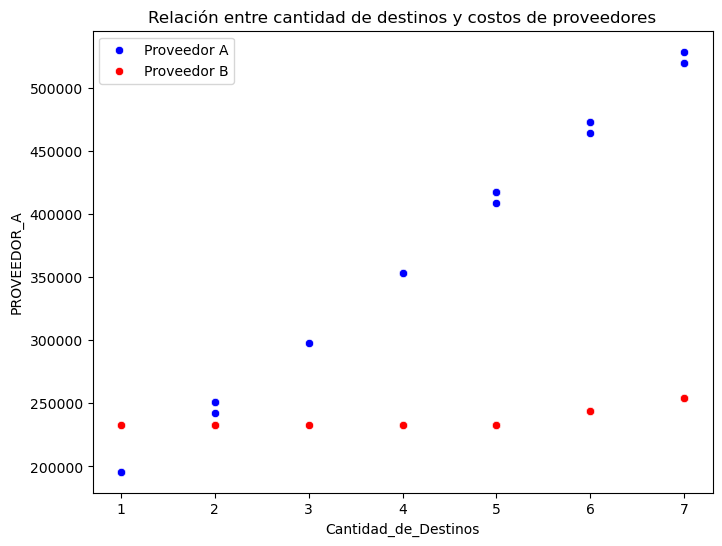

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viajes, x="Cantidad_de_Destinos", y="PROVEEDOR_A", label="Proveedor A", color="blue")
sns.scatterplot(data=df_viajes, x="Cantidad_de_Destinos", y="PROVEEDOR_B", label="Proveedor B", color="red")
plt.title("Relación entre cantidad de destinos y costos de proveedores")
plt.legend()
plt.show()


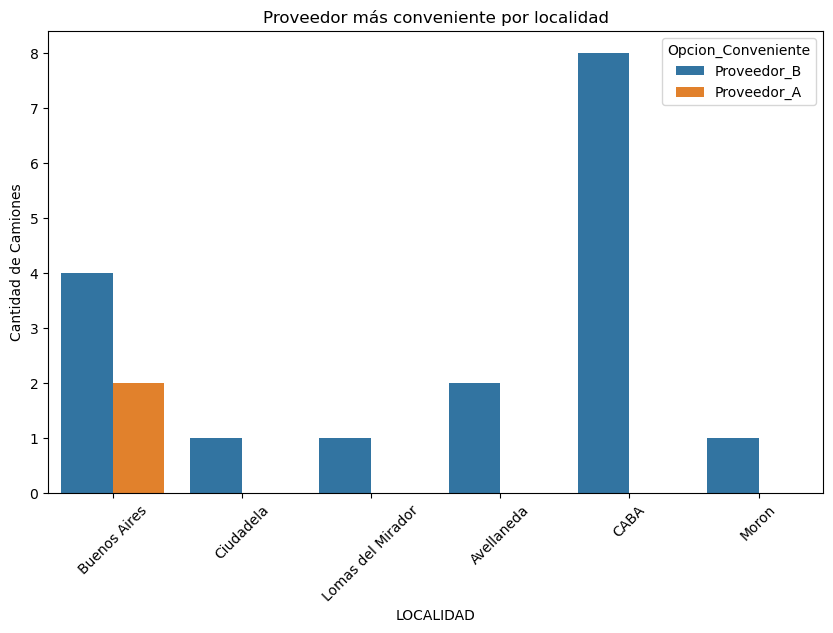

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viajes, x="LOCALIDAD", hue="Opcion_Conveniente")
plt.xticks(rotation=45)
plt.title("Proveedor más conveniente por localidad")
plt.ylabel("Cantidad de Camiones")
plt.show()

In [37]:
df_viajes["Cantidad_de_Destinos"] = df_viajes["Cantidad_de_Destinos"].astype(int)

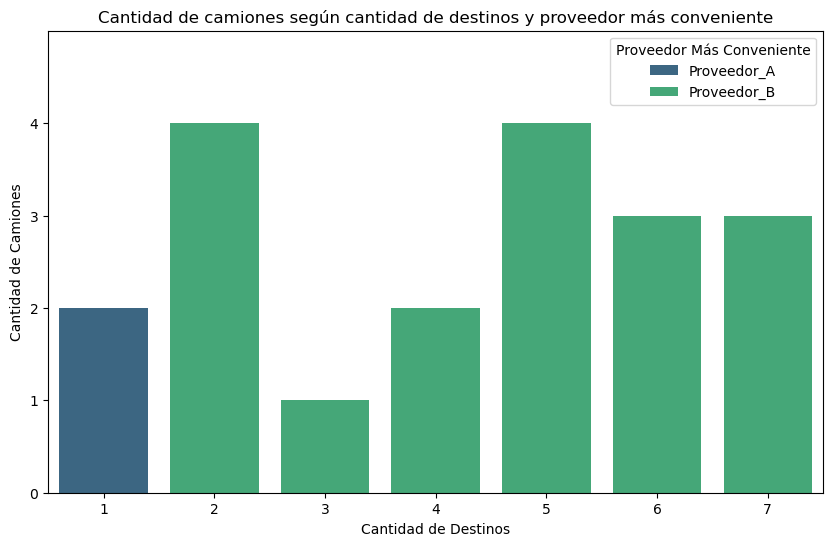

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_viajes, x="Cantidad_de_Destinos", hue="Opcion_Conveniente", palette="viridis")

max_value = df_viajes["Cantidad_de_Destinos"].value_counts().max()  
plt.yticks(np.arange(0, max_value + 1, step=1))

plt.title("Cantidad de camiones según cantidad de destinos y proveedor más conveniente")
plt.xlabel("Cantidad de Destinos")
plt.ylabel("Cantidad de Camiones")
plt.legend(title="Proveedor Más Conveniente")
plt.ylim(0,5)
plt.show()
